# **Object Recognition**

# **Using Naive Bayes**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import cifar10

##  Load the CIFAR-10 Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


##  Normalize and Flatten the Images

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print("Flattened training shape:", X_train_flat.shape)

Flattened training shape: (50000, 3072)


## Reduce Dataset Size

In [5]:
X_train_sub, _, y_train_sub, _ = train_test_split(X_train_flat, y_train, train_size=10000, stratify=y_train, random_state=42)
X_test_sub, _, y_test_sub, _ = train_test_split(X_test_flat, y_test, train_size=2000, stratify=y_test, random_state=42)

## Apply PCA for Dimensionality Reduction

In [6]:
pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train_sub)
X_test_pca = pca.transform(X_test_sub)

print("Reduced dimensions:", X_train_pca.shape[1])

Reduced dimensions: 100


## Train Naive Bayes Model

In [7]:
nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train_sub)

GaussianNB()

## Evaluate Model Accuracy

In [8]:
y_pred_nb = nb_model.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test_sub, y_pred_nb))
print(classification_report(y_test_sub, y_pred_nb))

Accuracy: 0.3275
              precision    recall  f1-score   support

           0       0.42      0.29      0.35       200
           1       0.41      0.46      0.43       200
           2       0.12      0.06      0.08       200
           3       0.22      0.16      0.18       200
           4       0.23      0.55      0.32       200
           5       0.34      0.23      0.28       200
           6       0.41      0.35      0.38       200
           7       0.41      0.26      0.31       200
           8       0.45      0.44      0.44       200
           9       0.34      0.48      0.40       200

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.32      2000
weighted avg       0.33      0.33      0.32      2000



## Confusion Matrix Visualization

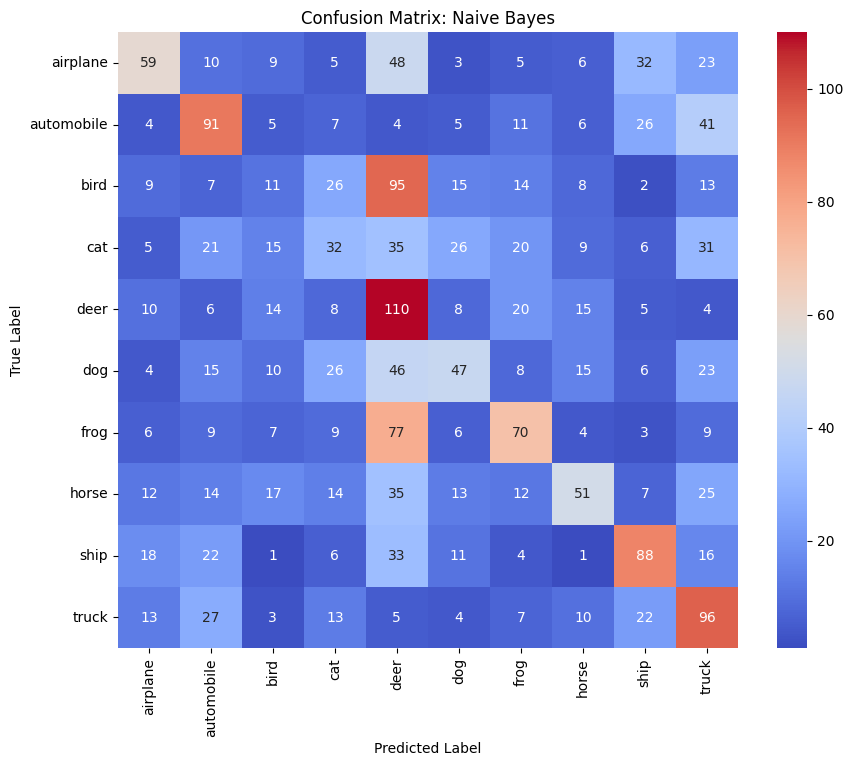

In [9]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

conf_mat_nb = confusion_matrix(y_test_sub, y_pred_nb)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: Naive Bayes")
plt.show()

## Visualize Some Predictions

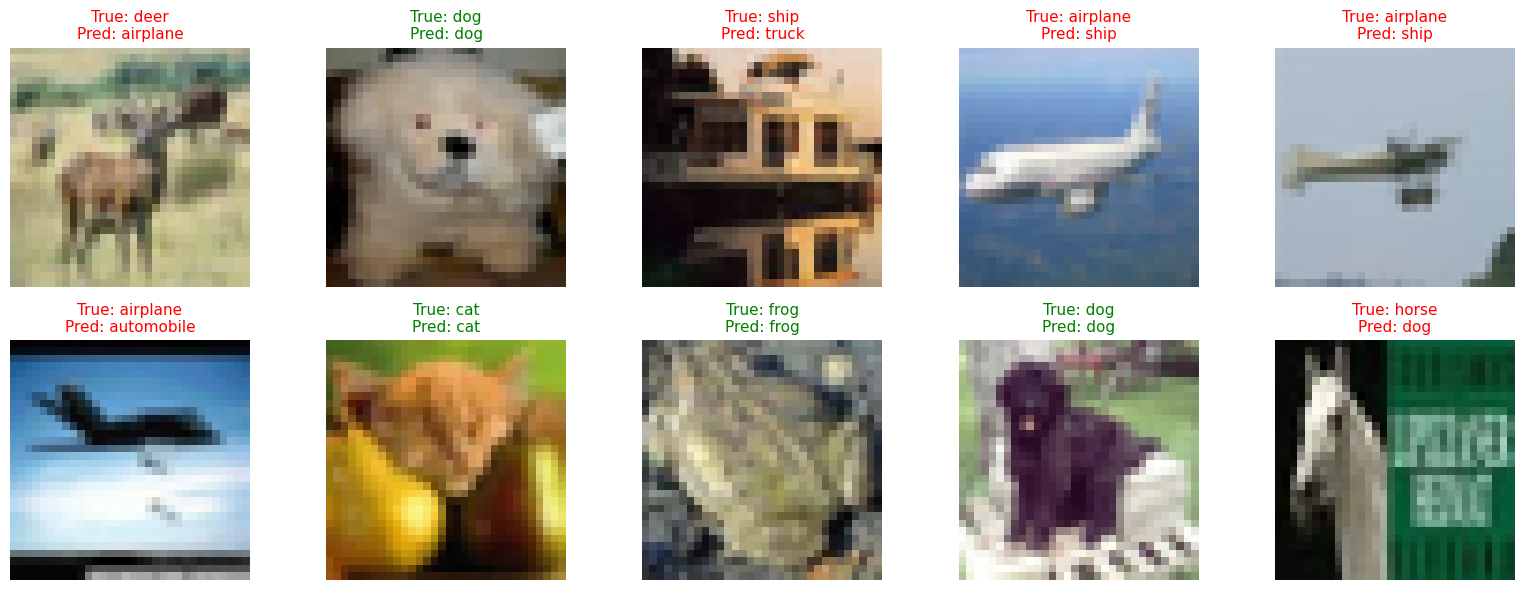

In [14]:
import random
# Select random indices to display
num_samples = 10
indices = random.sample(range(len(X_test_pca)), num_samples)

# Plot
plt.figure(figsize=(16, 6))

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    # Get original image (not PCA) and reshape for display
    image = X_test_sub[idx].reshape(32, 32, 3)

    # Prediction info
    true_label = class_names[y_test_sub[idx]]
    pred_label = class_names[y_pred_nb[idx]]

    # Display image
    plt.imshow(image)
    plt.axis('off')

    # Color-coded title
    color = 'green' if true_label == pred_label else 'red'
    title_text = f"True: {true_label}\nPred: {pred_label}"
    plt.title(title_text, color=color, fontsize=11)

plt.tight_layout()
plt.show()